In [2]:
import os.path
from importlib import reload 

import matplotlib.pyplot as  plt
import numpy as np 
import cv2

import glob 

# our own utility functions
import  util as u 
import camera_calibration as cc 
import  pipeline as p 

reload( u )


<module 'util' from 'C:\\Users\\Mateo\\Documents\\git\\CarND-Adv-Lane\\util.py'>

### Camera calibration

We first load a distorted image

img_filename = ./camera_cal\calibration1.jpg ret=False len(corners)=0 len(imgpoints)=0
img_filename = ./camera_cal\calibration10.jpg ret=True len(corners)=54 len(imgpoints)=1
img_filename = ./camera_cal\calibration11.jpg ret=True len(corners)=54 len(imgpoints)=2
img_filename = ./camera_cal\calibration12.jpg ret=True len(corners)=54 len(imgpoints)=3
img_filename = ./camera_cal\calibration13.jpg ret=True len(corners)=54 len(imgpoints)=4
img_filename = ./camera_cal\calibration14.jpg ret=True len(corners)=54 len(imgpoints)=5
img_filename = ./camera_cal\calibration15.jpg ret=True len(corners)=54 len(imgpoints)=6
img_filename = ./camera_cal\calibration16.jpg ret=True len(corners)=54 len(imgpoints)=7
img_filename = ./camera_cal\calibration17.jpg ret=True len(corners)=54 len(imgpoints)=8
img_filename = ./camera_cal\calibration18.jpg ret=True len(corners)=54 len(imgpoints)=9
img_filename = ./camera_cal\calibration19.jpg ret=True len(corners)=54 len(imgpoints)=10
img_filename = ./camera_cal\cali

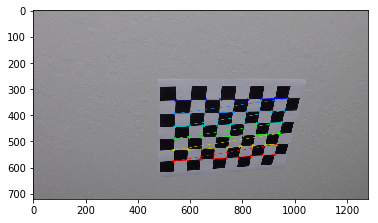

In [3]:
nx = 9 
ny = 6

img_filenames = glob.glob("./camera_cal/calibration*.jpg") 

mtx, dist = cc.calibrate_cam( img_filenames, nx=nx, ny=ny, draw=1)

In [4]:
mtx, dist

(array([[1.15777818e+03, 0.00000000e+00, 6.67113857e+02],
        [0.00000000e+00, 1.15282217e+03, 3.86124583e+02],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 array([[-0.24688507, -0.02373155, -0.00109831,  0.00035107, -0.00259868]]))

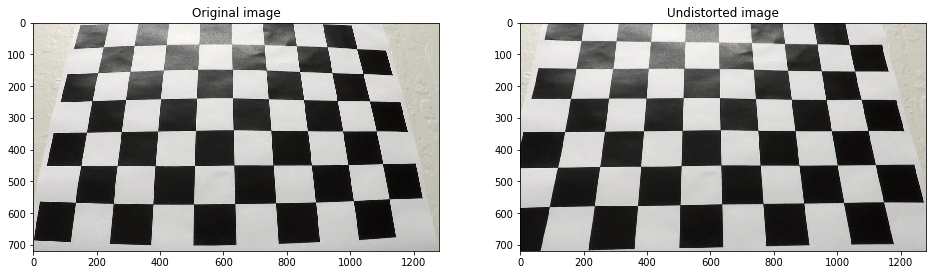

In [5]:
#help( plt.figure )
img = u.rgb_read( './camera_cal/calibration3.jpg' )
undistorted = cv2.undistort(img, mtx, dist, None, mtx)

fig, (ax1,ax2) = plt.subplots( 1,2, figsize=(16,6) )
ax1.set_title( 'Original image')
ax1.imshow( img )
ax2.set_title( 'Undistorted image')
ax2.imshow( undistorted )

## Pipeline (test images) 

In [6]:
test_img_fns = glob.glob( './test_images/*.jpg' ) 

In [93]:
for img_fn in test_img_fns : 
    distorted = u.rgb_read( img_fn )
    undistorted = cv2.undistort(img, mtx, dist, None, mtx)    
    name_noext, _ = os.path.splitext( os.path.basename( img_fn )) 
    out_fn =  'output_images/' + name_noext + '_undistorted.jpg'
    print( "Writing " + out_fn ) 
    cv2.imwrite( out_fn , undistorted  )

Writing output_images/straight_lines1_undistorted.jpg
Writing output_images/straight_lines2_undistorted.jpg
Writing output_images/test1_undistorted.jpg
Writing output_images/test2_undistorted.jpg
Writing output_images/test3_undistorted.jpg
Writing output_images/test4_undistorted.jpg
Writing output_images/test5_undistorted.jpg
Writing output_images/test6_undistorted.jpg


img.shape=(720, 1280, 3) img.max()=255
img.shape=(720, 1280, 3) img.max()=255


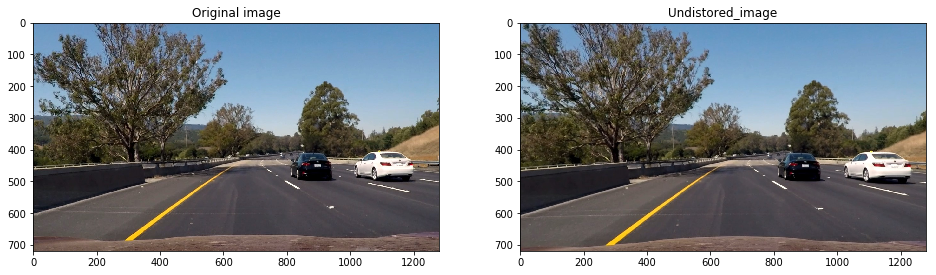

In [94]:
u.show2( distorted, undistorted, title1='Original image', title2='Undistored_image' )

In [10]:
binary = p.get_lane_pixels( undistorted )

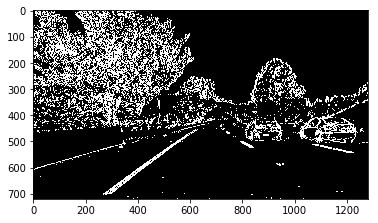

In [11]:
plt.imshow( binary, cmap='gray')

In [13]:
distorted = u.rgb_read( "test_images/straight_lines2.jpg" )
undistorted = cv2.undistort(distorted, mtx, dist, None, mtx)

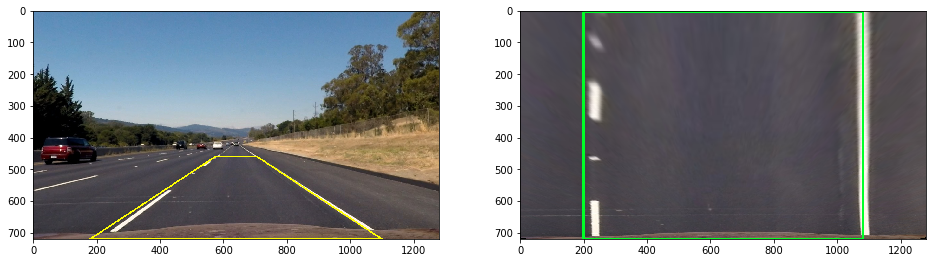

In [18]:
reload( p )

imgc = undistorted.copy()
corners = p.construct_trapezoid( imgc, top_offset = 100, alpha_top = 0.37, alpha_bottom=0.72 )

p.draw_four_corners( imgc, corners )

M, dst_points = p.get_perspective_transform( imgc, corners,offset_x=200 )

warped = p.warp_perspective(undistorted,  M )

p.draw_four_corners( warped, dst_points, color=(0,255, 40), tkn=5 )

u.show2( imgc, warped )


In [87]:
reload( u )
bin_gray = u.binary2gray( binary ) 


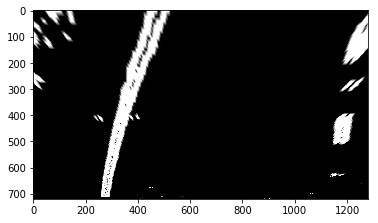

In [89]:
warped_gray = p.warp_perspective( bin_gray, M, flags=cv2.INTER_LINEAR)
plt.imshow( warped_gray, cmap='gray' )

In [80]:
reload(p)

<module 'pipeline' from 'C:\\Users\\Mateo\\Documents\\git\\CarND-Adv-Lane\\pipeline.py'>

img.shape=(720, 1280, 3) img.max()=255


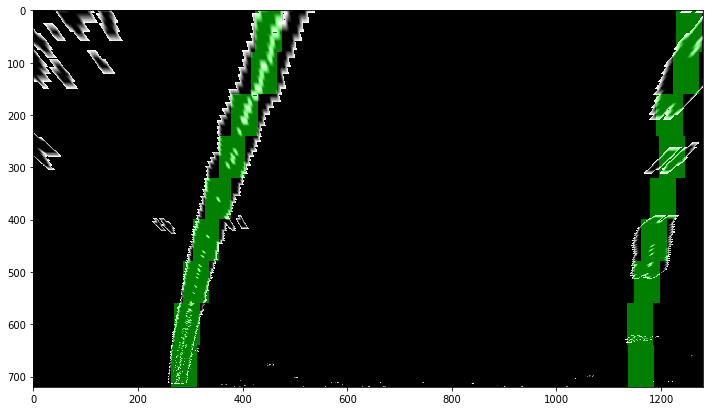

In [123]:
reload( u )
window_width  = 50
window_height = 80
margin = 100

out = p.show_window_search_results( warped_u8, window_width, window_height, margin ) 
u.show(out) 

In [67]:
del right_lane

In [124]:
reload(p)
window_centroids, left_lane, right_lane = p.sliding_window_search(warped_u8, win_w=window_width, 
                                                                  win_h=window_height, margin=margin)

img.shape=(720, 1280) img.max()=True
img.shape=(720, 1280) img.max()=True


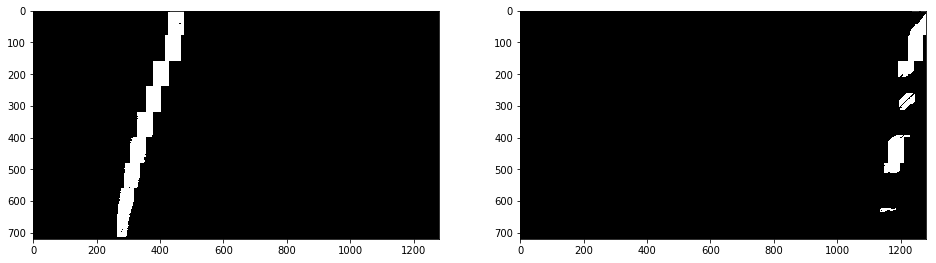

In [125]:
reload(u )
u.show2( left_lane,  right_lane )

In [84]:
distorted = u.rgb_read( "test_images/test1.jpg" )
undistorted = cv2.undistort(distorted, mtx, dist, None, mtx)
warped = p.warp_perspective(undistorted,  M )
binary3 = np.uint8( p.get_lane_pixels( undistorted ) * 255 ) 

#b3 = u.binary2rgb( binary )
warp_bin = p.warp_perspective( binary3, M )

c, left_lane, right_lane = p.sliding_window_search(warp_bin, win_w=window_width, win_h=window_height, margin=margin)


img.shape=(720, 1280) img.max()=True
img.shape=(720, 1280) img.max()=True


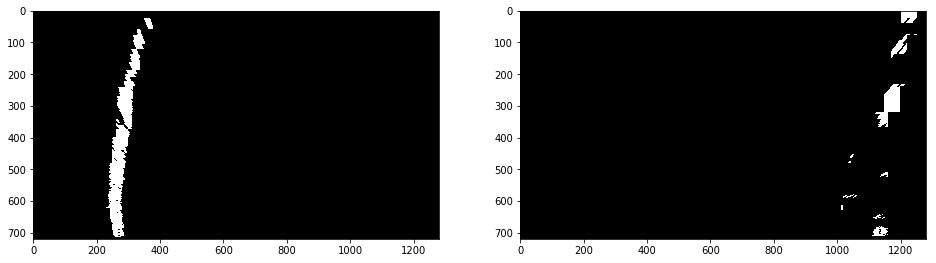

In [85]:
u.show2( left_lane, right_lane )

In [109]:


left_fit, right_fit 

# Visualization
left_lane_rgb = u.binary2rgb( left_lane )

img_height=left_lane.shape[0]

ploty = np.linspace(0, img_height - 1, img_height)
left_fitx  = np.polyval( left_fit, ploty ) 
right_fitx = np.polyval( right_fit, ploty )

img.shape=(720, 1280, 3) img.max()=255


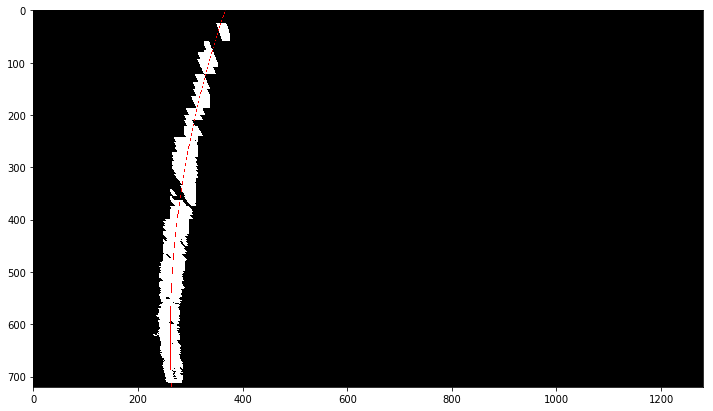

In [113]:
#u.np_describe( left_fitx )
#plt.plot( left_fitx, ploty ) 

left_curve  = np.polyval( left_fit , nonzeroy )
right_curve = np.polyval( right_fit, nonzeroy )

    left_lane_inds  = ( (nonzerox < left_curve  + margin) & ( nonzerox >= left_curve  - margin ) ).nonzero()[0]
    right_lane_inds = ( (nonzerox < right_curve + margin) & ( nonzerox >= right_curve - margin ) ).nonzero()[0]

left_lane_rgb[ np.int16(ploty), np.int16(left_fitx), : ] = [255, 0, 0 ]

u.show( left_lane_rgb )

0 [-2.75591107e-04  3.71394436e-01  1.73443030e+02] [-2.02124424e-04  3.93585673e-01  9.99239053e+02]
1 [-3.19936290e-04  4.06487737e-01  1.70969960e+02] [-2.80606126e-04  4.61346486e-01  9.83790451e+02]
img.shape=(720, 1280, 3) img.max()=255
2 [-3.30135861e-04  4.18178751e-01  1.68740282e+02] [-3.99395233e-04  5.74374650e-01  9.58028778e+02]
img.shape=(720, 1280, 3) img.max()=255
3 [-3.25266657e-04  4.15154631e-01  1.69939266e+02] [-3.97047277e-04  5.93843872e-01  9.46068187e+02]
img.shape=(720, 1280, 3) img.max()=255
4 [-3.39454123e-04  4.33379854e-01  1.65521929e+02] [-3.49853495e-04  5.62260465e-01  9.47922702e+02]
img.shape=(720, 1280, 3) img.max()=255
5 [-3.33605565e-04  4.34204531e-01  1.64788883e+02] [-2.39361422e-04  4.80443971e-01  9.54889727e+02]
img.shape=(720, 1280, 3) img.max()=255
6 [-3.15031900e-04  4.29819179e-01  1.61134686e+02] [-1.70880915e-04  4.25285791e-01  9.65941516e+02]
img.shape=(720, 1280, 3) img.max()=255
7 [-3.02511594e-04  4.24820178e-01  1.61806417e+02] 

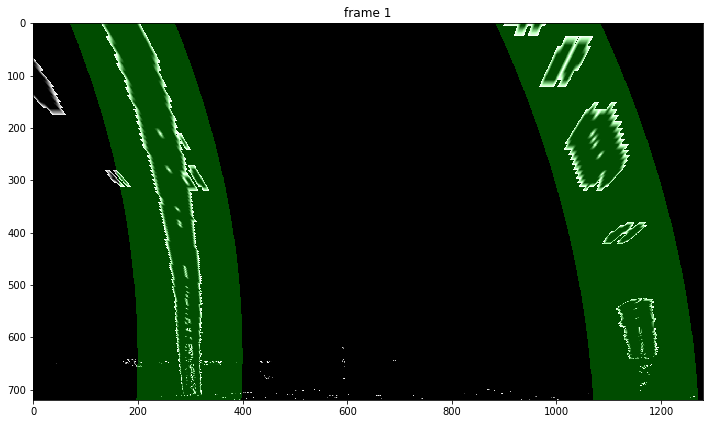

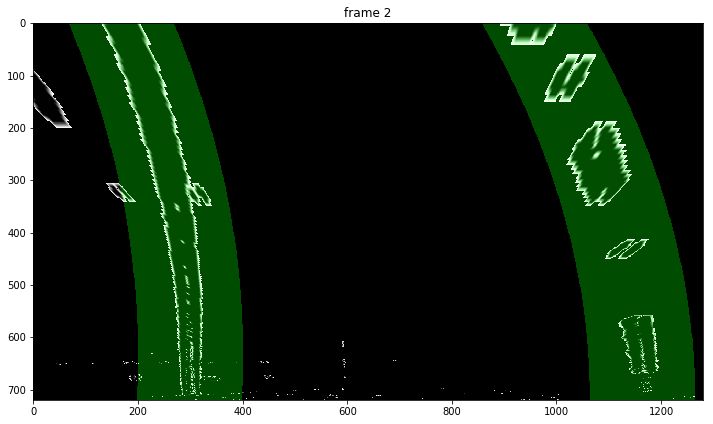

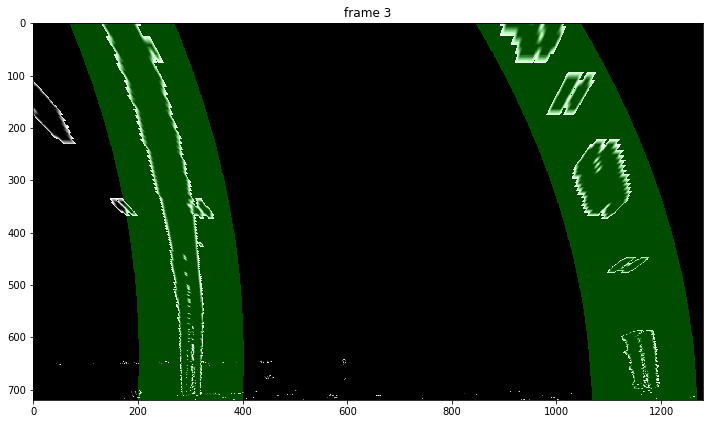

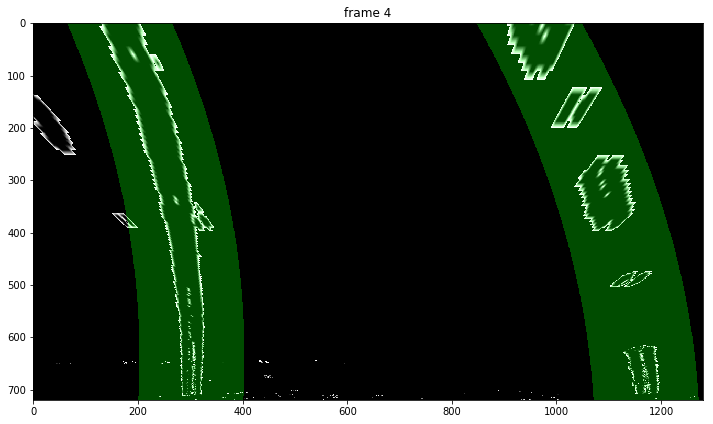

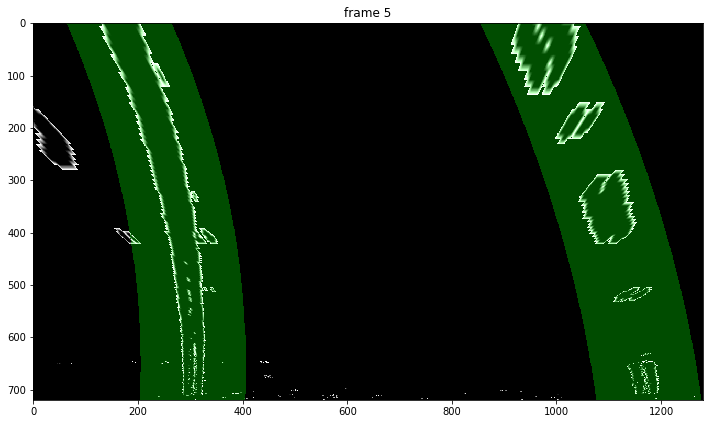

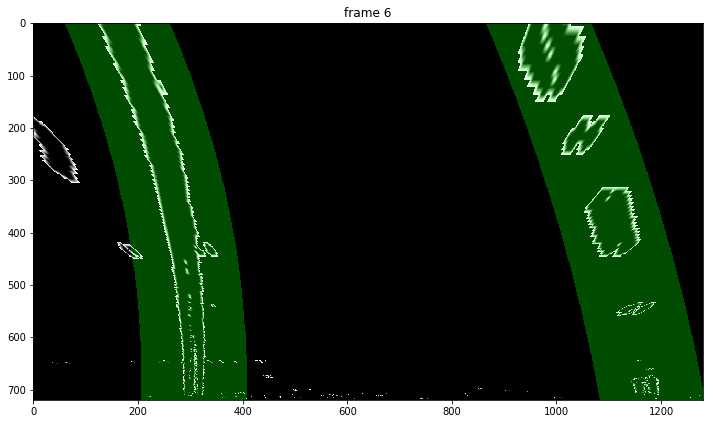

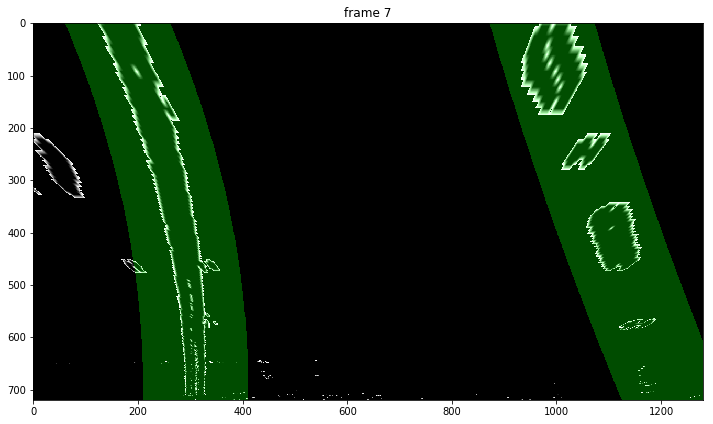

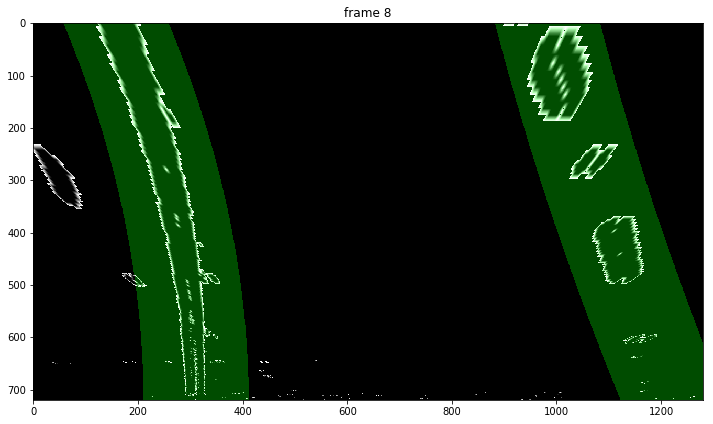

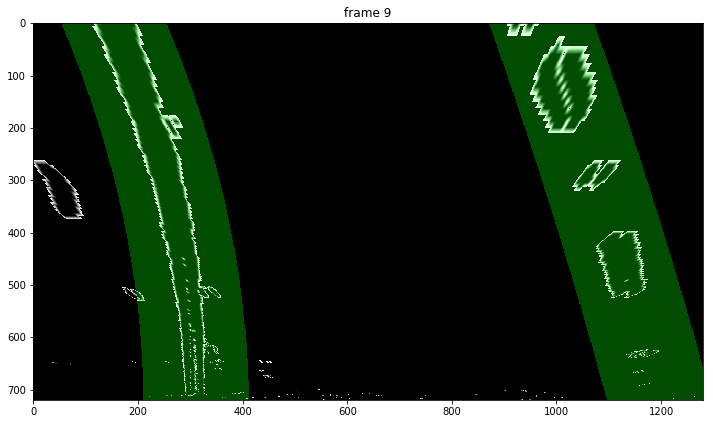

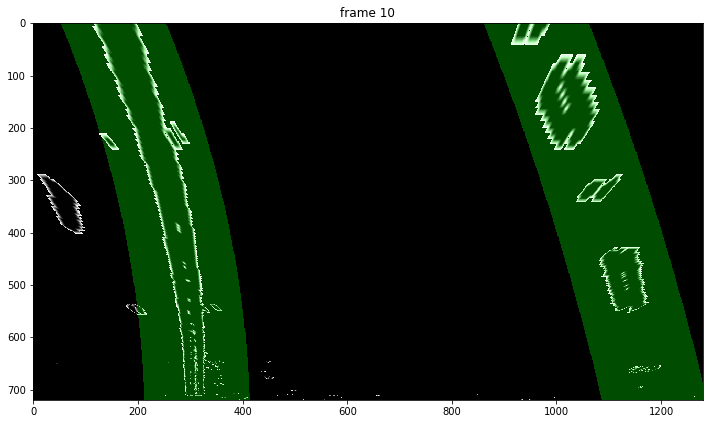

In [139]:
reload( p )
    
for i, frame in enumerate( u.frames_generator( "c:/_data/CarND-videos/Project_video.mp4" ) ) :
    if i > 10 : 
        break    
    distorted = u.bgr2rgb( frame )     
    undistorted = cv2.undistort(distorted, mtx, dist, None, mtx)
    
    warped = p.warp_perspective(undistorted,  M )
    
    lane_pixels0 = p.get_lane_pixels( undistorted )
    
    bin_gray = u.binary2gray( lane_pixels0  ) 
    
    warp_bin = p.warp_perspective( bin_gray, M )
        
    if i == 0 : 
        # Hard work for frame 0...
        c, left_lane, right_lane = p.sliding_window_search(warp_bin, win_w=window_width, win_h=window_height, margin=margin)

        left_fit, right_fit = p.fit_polys0( left_lane, right_lane )
        print( i, left_fit, right_fit ) 
        
        #u.show2( left_lane, right_lane, title1="frame %d L" % i, title2="frame %d R" % i ) 
    
    else :
        left_fit, right_fit = p.fit_new_polys( warp_bin, left_fit, right_fit, margin=100 )
        print( i, left_fit, right_fit ) 
        
        img = p.draw_search_windows( warp_bin, left_fit, right_fit, margin ) 
        u.show( img , title="frame %d" % i )
           
        